In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")


In [3]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

<Axes: xlabel='Age'>

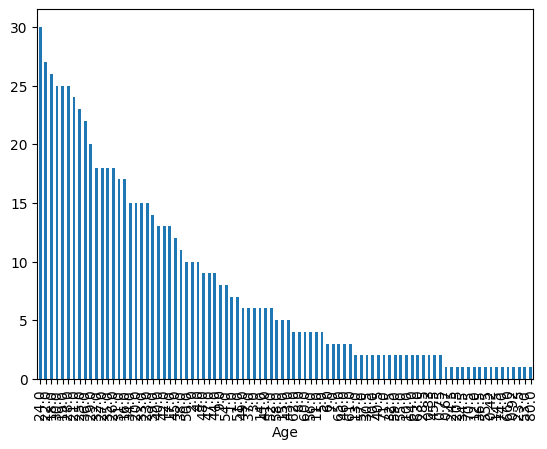

In [4]:
df["Age"].value_counts().plot(kind="bar")

In [5]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [6]:
df.loc[df["Sex"] == "male", "Sex"] = 0
df.loc[df["Sex"] == "female", "Sex"] = 1
# Age make a ceil of the age
df["Age"] = df["Age"].fillna(df["Age"].mean()).apply(lambda x: int(x))

In [7]:
df.drop(columns=["PassengerId","Name","Ticket","Fare","Cabin","Embarked"], inplace=True)


In [8]:
df

Survived  Pclass Sex  Age  SibSp  Parch
0           0       3   0   22      1      0
1           1       1   1   38      1      0
2           1       3   1   26      0      0
3           1       1   1   35      1      0
4           0       3   0   35      0      0
..        ...     ...  ..  ...    ...    ...
886         0       2   0   27      0      0
887         1       1   1   19      0      0
888         0       3   1   29      1      2
889         1       1   0   26      0      0
890         0       3   0   32      0      0

[891 rows x 6 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Age       891 non-null    int64 
 4   SibSp     891 non-null    int64 
 5   Parch     891 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 41.9+ KB


In [10]:
df.loc[df['Age'].isna(), 'Age'] = df['Age'].mean()
#df.loc[df['Embarked'].isna(), 'Embarked'] = df['Embarked'].mode()[0]


/tmp/ipykernel_6246/4098537744.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.544332210998878' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Age'].isna(), 'Age'] = df['Age'].mean()


In [11]:
X = df[[
    "Pclass",
    "Sex",
    "Age",
    "SibSp",
    "Parch"
]]
X

Pclass Sex   Age  SibSp  Parch
0         3   0  22.0      1      0
1         1   1  38.0      1      0
2         3   1  26.0      0      0
3         1   1  35.0      1      0
4         3   0  35.0      0      0
..      ...  ..   ...    ...    ...
886       2   0  27.0      0      0
887       1   1  19.0      0      0
888       3   1  29.0      1      2
889       1   0  26.0      0      0
890       3   0  32.0      0      0

[891 rows x 5 columns]

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


In [13]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

print(model.score(X_test, y_test))
print(model.score(X_train, y_train))


model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

print(model1.score(X_test, y_test))
print(model1.score(X_train, y_train))

model2 = svm.SVC()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

print(model2.score(X_test, y_test))
print(model2.score(X_train, y_train))



0.8044692737430168
0.8370786516853933
0.8435754189944135
0.9143258426966292
0.6089385474860335
0.648876404494382
